In [10]:
import numpy as np 
import matplotlib.pyplot as plt

In [11]:
def read_coordinates(filename):
    coordinates = []
    split_idx = -1
    with open(filename,'r') as coord_file:
        while True:
            p = coord_file.readline().strip('\n')
            if p == '':
                break
            try:
                x,y = p.split('\t')
                coordinates.append((float(x),float(y)))
            except ValueError:
                split_idx = int(p)
    left_pupil = coordinates.pop() # last coord
    right_pupil = coordinates.pop() # before last coord 
    upper_right_contour = coordinates[:split_idx]
    upper_left_contour = coordinates[split_idx:]
    return upper_right_contour,upper_left_contour, right_pupil,left_pupil
            

def choose_best_fit_degree(contour):
    x = [c[0] for c in contour]
    y = [c[1] for c in contour]
    degree = 5
    p = np.polyfit(x,y,degree)
    return x , np.poly1d(p)

def plot_contour(right_contour,left_contour,right_pupil,left_pupil):
    if not plt.gca().yaxis_inverted():
        plt.gca().invert_yaxis()
    plt.scatter(right_pupil[0],right_pupil[1],c='b')
    plt.scatter(left_pupil[0],left_pupil[1],c='r')
    x_right,fx = choose_best_fit_degree(right_contour)
    print(f"Equation of the right eye : \n {fx}")
    x_right_new = np.linspace(min(x_right),max(x_right),100)
    y_right_new = fx(x_right_new)
    plt.plot(x_right_new,y_right_new,c='b')

    x_left,gx = choose_best_fit_degree(left_contour)
    print(f"Equation of the left eye: \n {np.poly1d(gx)}")
    x_left_new = np.linspace(min(x_left),max(x_left),100)
    y_left_new = gx(x_left_new)
    plt.plot(x_left_new,y_left_new,c='r')
    plt.show()

    # create a table to show the statistics
    mrd1_right = abs(round((fx(right_pupil[0]) - right_pupil[1])/10,2))
    print(f"MRD1 right eye : {mrd1_right} mm" )

    mrd1_left = abs(round((gx(left_pupil[0]) - left_pupil[1])/10,2))
    print(f"MRD1 left eye : {mrd1_left} mm" )

    mrd1phul_right = abs(x_right_new[np.argmax(fx(x_right_new))] - right_pupil[0])/100
    print(f"PHUL - MRD1 right_eye: {round(mrd1phul_right,2)} mm")
    mrd1phul_left = abs(x_left_new[np.argmax(gx(x_left_new))] - left_pupil[0])/100

    print(f"PHUL - MRD1 left_eye: {round(mrd1phul_left,2)} mm")

    
    print(f"Similarity between MRD1 in both eyes :{100 * min(mrd1_left,mrd1_right)/max(mrd1_right,mrd1_left):.2f} %")
    print(f"Similarity between PHUL - MRD1 in both eyes :{100 * min(mrd1phul_right,mrd1phul_left)/ max(mrd1phul_right,mrd1phul_left):.2f} %")
    


Equation of the right eye : 
             5             4            3          2
-9.208e-10 x + 1.743e-06 x - 0.001307 x + 0.4888 x - 91.57 x + 7368
Equation of the left eye: 
             5             4             3          2
-1.825e-11 x + 1.841e-07 x - 0.0005198 x + 0.6449 x - 374.7 x + 8.422e+04


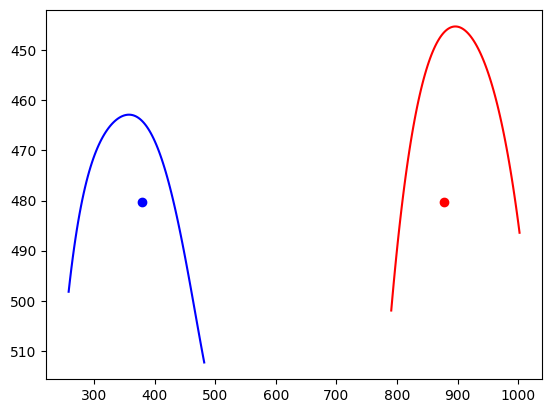

MRD1 right eye : 1.62 mm
MRD1 left eye : 3.38 mm
PHUL - MRD1 right_eye: 1.03 mm
PHUL - MRD1 left_eye: 0.87 mm
Similarity between MRD1 in both eyes :47.93 %
Similarity between PHUL - MRD1 in both eyes :84.58 %


In [12]:
upper_right_contour,upper_left_contour,right_pupil,left_pupil = read_coordinates('rotated.txt')
plot_contour(upper_right_contour,upper_left_contour,right_pupil,left_pupil)

Equation of the right eye : 
            5             4             3            2
2.852e-10 x - 1.379e-07 x + 2.519e-05 x + 0.003308 x - 1.481 x + 309.5
Equation of the left eye: 
            5             4           3         2
1.254e-09 x - 3.163e-06 x + 0.00315 x - 1.539 x + 365.4 x - 3.3e+04


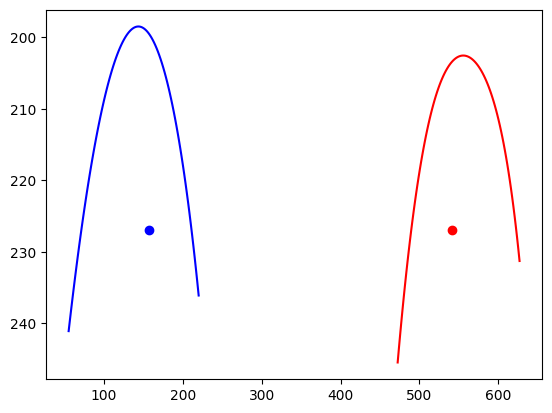

MRD1 right eye : 2.74 mm
MRD1 left eye : 2.37 mm
PHUL - MRD1 right_eye: 1.02 mm
PHUL - MRD1 left_eye: 0.7 mm
Similarity between MRD1 in both eyes :86.50 %
Similarity between PHUL - MRD1 in both eyes :67.80 %


In [13]:
upper_right_contour,upper_left_contour,right_pupil,left_pupil = read_coordinates('rotated_post.txt')

plot_contour(upper_right_contour,upper_left_contour,right_pupil,left_pupil)